# 131. Conceitos da Aprendizagem por Reforço

## **APRENDIZAGEM POR REFORÇO**

> Apredizado para tomar uma sequência de decisões até atingir uma meta sem ter parâmetros de referência.

> O aprendizado se dá por tentativa e erro.

> O agente percebe se está certo quando recebe uma recompensa e se está errado quando recebe uma penalidade.

> Isto é, aprende tanto com erros como com acertos, assim como o ser humano.

## Algumas aplicações

- Jogos
- Robótica
- Mercado Financeiro
- Aperfeiçoamento de carros autônomos
- Preços dinâmicos e personalizados
- Definição de estratégias para tratamnto de doenças

## Nomenclaturas

1) Agente: Entidade que irá aprender (software e/ou hardware).
2) Ambiente: Espaço de ação do agente (físico ou virtual).
3) Estado (s): situação atual do agente e ambiente.
4) Política (pi): estratégia para a próxima ação.
5) Recompensa (r): referência par ao agente sobre sua ação.

## Principais Algoritmos

> Q-Learning:
>> Estabelece, de forma autônoma, ações de maneira interativa.

> SARSA:
>> Similar ao Q-Learning, mas obedece outra função matemática.

> Q(lambda):
>> Registros temporários da ocorrência de um evento.

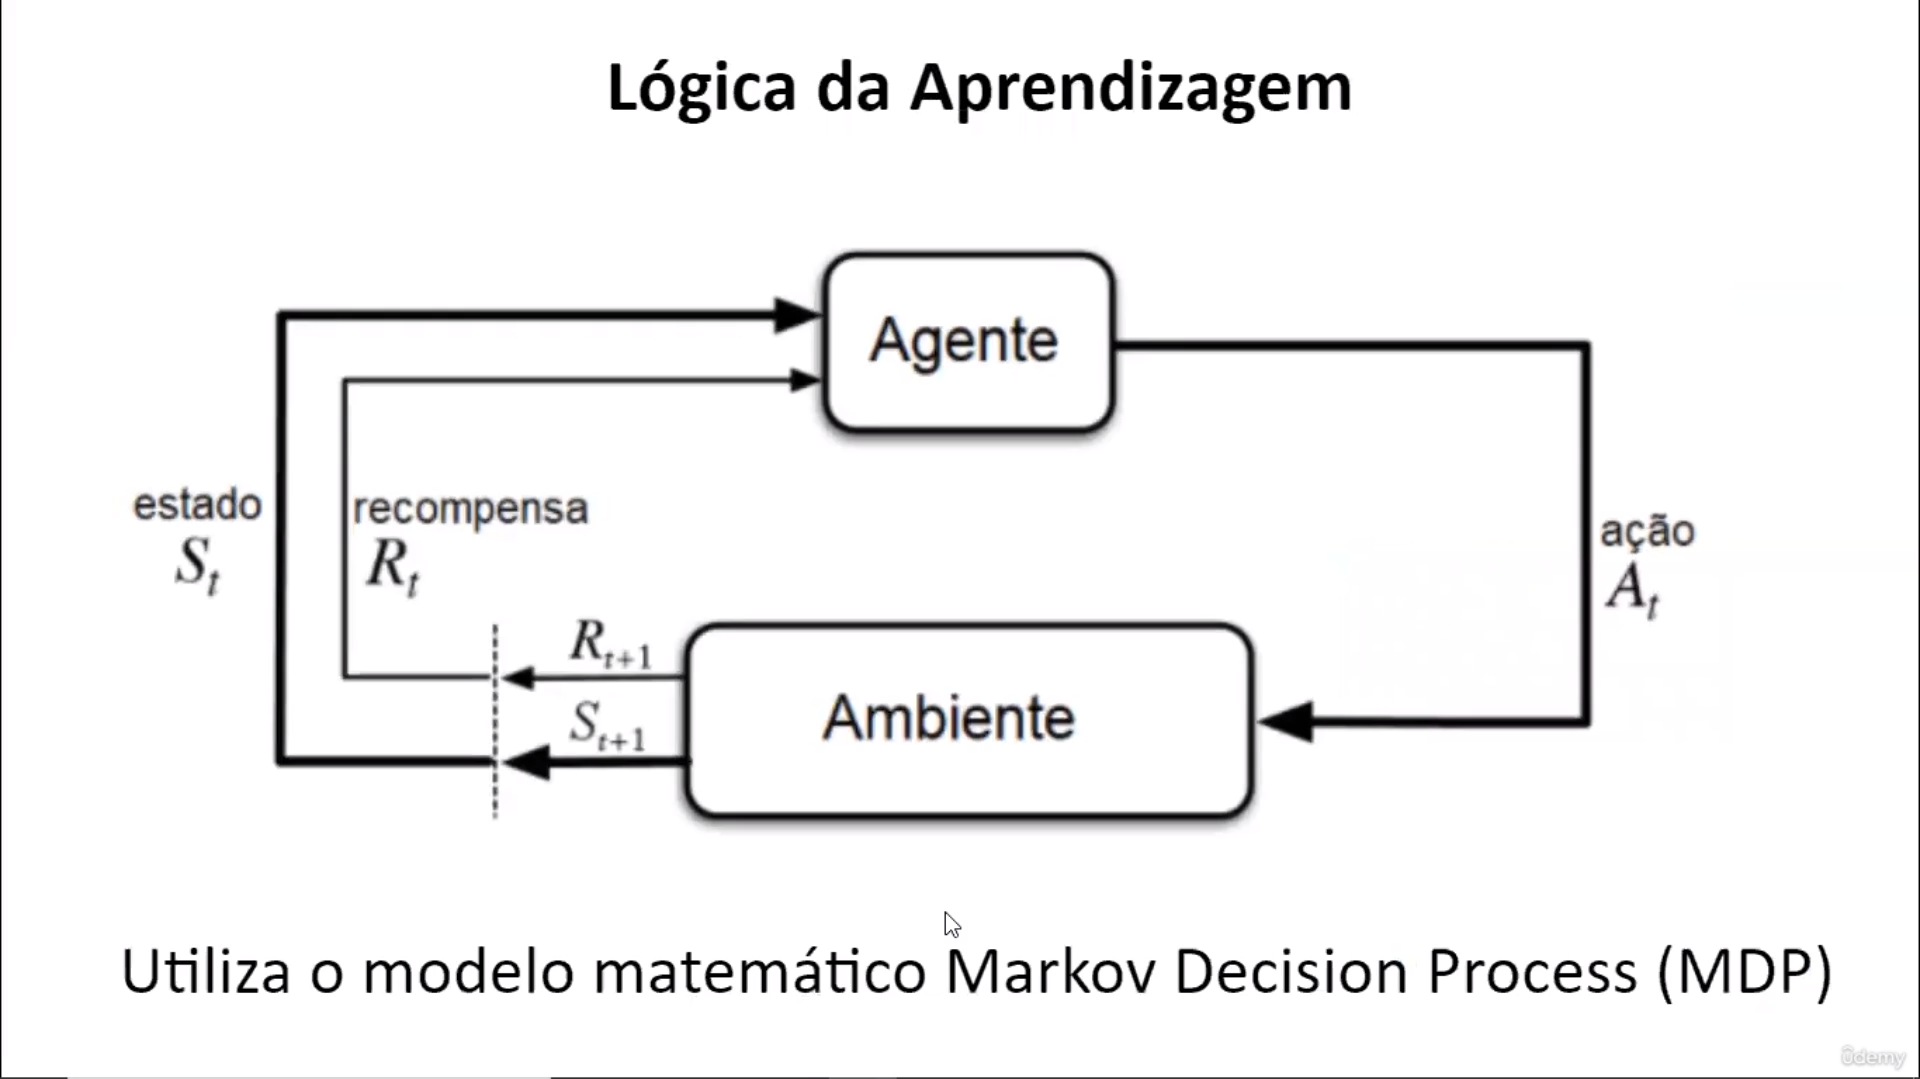

In [18]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Machine Learning com Python\ML_Jupyter_Anaconda\Secao_9_Reforco\Datasets\MDP.png')

# Exibir a imagem
imagem

## Equação de Bellman

**Q(state, action) = (1 - alpha) * Q(state, action) + alpha * (reward + gamma * max(Q(next state, all actions)))**

- alpha: taxa de aprendizagem
- gamma: fator de desconto

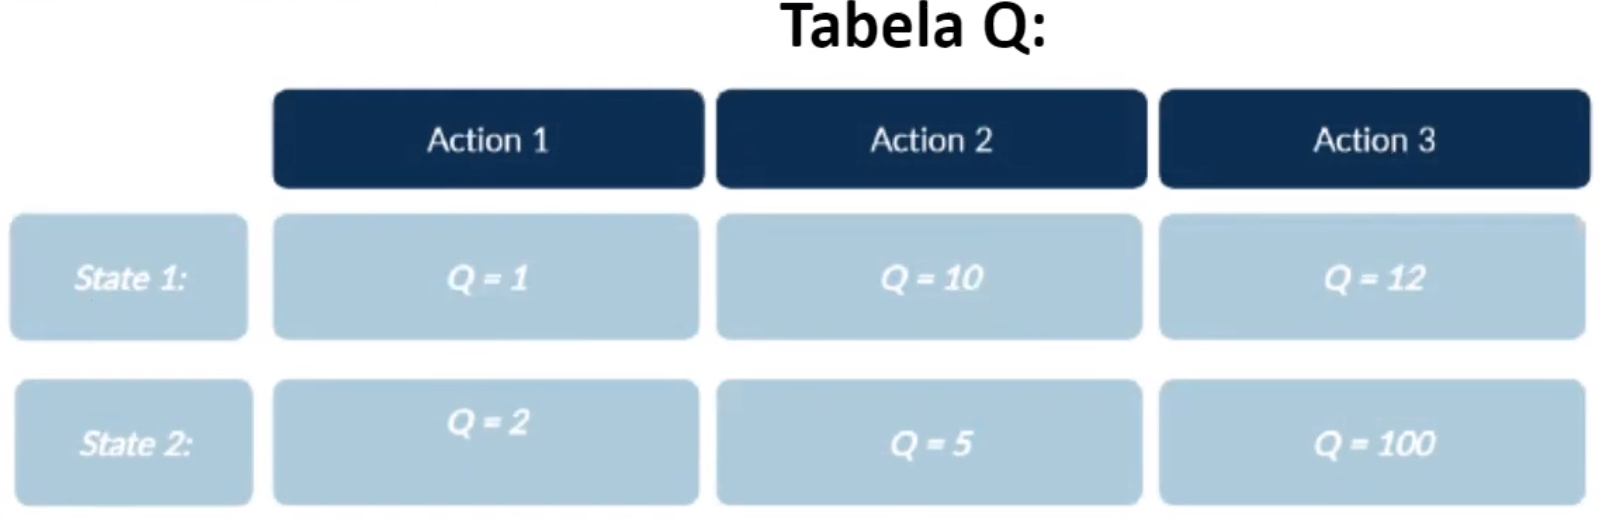

In [19]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Machine Learning com Python\ML_Jupyter_Anaconda\Secao_9_Reforco\Datasets\Qtable.png')

# Exibir a imagem
imagem

# 132. Conhecendo o problema

https://gym.openai.com/

https://gym.openai.com/envs/Taxi-v3/

## **Links de referência**

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

https://medium.com/turing-talks/aprendizado-por-refor%C3%A7o-4-gym-d18ac1280628

## **Instalando a Biblioteca GYM**

In [20]:
!pip install cmake 'gym[atari]' scipy

ERROR: Invalid requirement: "'gym[atari]'"


In [21]:
import gym

## **Carregando e renderizando o ambiente**

In [22]:
env = gym.make("Taxi-v3").env

In [23]:
## Função inoperante devido a inúmeros problemas na execução.
## Ela não é essencial para a aprendizagem por reforço, é apenas uma demonstração.
## Não retirei do vídeo porque a imagem ajuda no entendimento das ações.
# env.render()

In [24]:
## função inoperante
#env.render()

In [25]:
# redefinindo o ambiente e retornando um estado inicial aleatório.
env.reset()

(54, {'prob': 1.0, 'action_mask': array([1, 0, 1, 0, 0, 0], dtype=int8)})

env.reset: redefine o ambiente e retorna um estado inicial aleatório.

env.step(action): Apresenta os passos de ação.


In [26]:
# Print no espaço de ação discreto e no espaço de estado discreto
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


## **ESPAÇO DE ESTADO**

Espaço de estado da grade: 5x5 = 25

Espaço posição do passageiro: 5 (quatro pontos externos e um dentro do taxi)

Espaço de posição de embargue/desembarque (destino): 4

Total: 5x5x5x4 = 500 espaços de estado.

## **ESPAÇO DE AÇÃO**

O algoritmo escolherá um número de ação de 0 a 5, onde:

0 = sul

1 = norte

2 = leste

3 = oeste

4 = embarque

5 = desembarque

## **Colocando o taxi na linha 3, coluna 1, nosso passageiro no local 2 e nosso destino é o local 0.**

In [27]:
state = env.encode(3, 1, 2,0) # (linha do taxi, coluna do taxi, índice do passageiro, índice do destino)
print("State:", state)

env.s = state
# env.render() # função temporariamente inoperante

State: 328


Táxi amarelo é sem passageiro e verde é com passageiro.

A barra ("|") representa uma parede que o táxi não pode atravessar.

R, G, Y, B são os possíveis locais de coleta e destino. A **letra azul** representa o local de **embargue** do passageiro e a **letra roxa** é o **desembargue** do passageiro.

Recompensas (Já definidas na biblioteca):

+20 para um desembarque correto.

-10 para um embarque ou desembarque incorreto.

-1 para ações que não sejam as duas anteriores.

In [28]:
env.P[499]

{0: [(1.0, 499, -1, False)],
 1: [(1.0, 399, -1, False)],
 2: [(1.0, 499, -1, False)],
 3: [(1.0, 479, -1, False)],
 4: [(1.0, 499, -10, False)],
 5: [(1.0, 499, -10, False)]}

# 134. Treinamento do Algoritmo

In [31]:
import numpy as np
import pandas as pd
import random
from IPython.display import clear_output

In [34]:
tabela_qx = np.zeros([env.observation_space.n, env.action_space.n]) #iniciando a tabela Q
tabela_qp = pd.DataFrame(tabela_qx)
tabela_q = tabela_qp.values

In [35]:
tabela_q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [36]:
tabela_q.shape

(500, 6)

## **TREINAMENTO DO ALGORITMO**

In [37]:
# Não existem valores "certos" ou "errados", é por tentativa e erro.
alpha = 0.1
gamma = 0.6
epsilon = 0.1 # Determina a chance do agente tomar uma ação aleatória, nesse caso a chance é de 10%

for i in range(1, 200000):
    estado = env.reset()

    episodios, penalidades, recompensa = 0, 0, 0
    terminado = False

    while not terminado:
        if random.uniform(0, 1) < epsilon: # Decidindo se será tomada uma ação aleatória ou se seguirá a política da tabela-q
            acao = env.action_space.sample()
        else:
            acao = np.argmax(tabela_q[estado])

        proximo_estado, recompensa, terminado, info = env.step(acao)

        valor_antigo = tabela_q[estado, acao]
        proximo_max = np.max(tabela_q[proximo_estado])

        # Atualizando o valor de q a partir da equação de Bellman
        valor_novo = (1 - alpha) * valor_antigo + alpha * (recompensa + gamma * proximo_max)
        tabela_q[estado, acao] = valor_novo # Colocando este valor na tabela-q

        if recompensa == -10: # Contabilizando os embarques/desembarques errados
            penalidades += 1

        estado = proximo_estado
        episodios += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episódios: {i}")

print("Treinamento terminado.\n")

C:\Users\Nayan Couto\.conda\envs\POO\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ValueError: too many values to unpack (expected 4)

**AVALIAÇÃO DO ALGORITMO**

In [ ]:
total_penalidades = 0
episodios = 100
frames = []

for i in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(tabela_q[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1

    frames.append({
        'frame': env.render(mode='ansi'),
        'state': estado,
        'action': acao,
        'reward': recompensa
    })

  total_penalidades += penalidades

print('Episódios', episodios)
print('Penalidades', total_penalidades)

In [ ]:
from time import sleep
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('Estado', frame['state'])
  print('Ação', frame['action'])
  print('Recompensa', frame['reward'])
  sleep(.2)